# Dataset example

In [11]:
import pyarrow.parquet as pq
file = pq.ParquetFile('./dataset/train-00001-of-00054-c76023902046cea3.parquet')
df = file.read().to_pandas()

In [13]:
df

,image,text
0,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,a photography of a baby wearing a hat and smiling
1,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,a photography of a man with glasses and a blue...
2,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,a photography of a young girl with a cell phon...
3,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,a photography of a woman with long hair and a ...
4,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,a photography of a woman with a tie and a man ...
...,...,...
1292,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,a photography of a woman with a microphone in ...
1293,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,a photography of a man with glasses and a tie ...
1294,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,a photography of a man with glasses and a red ...
1295,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,a photography of a man with a headset on speak...


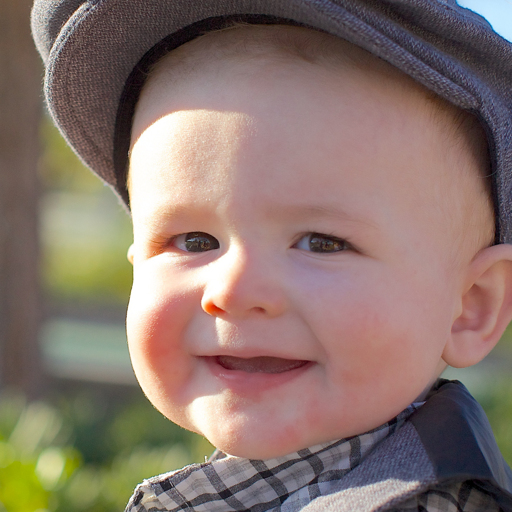

In [12]:
image_stream = io.BytesIO(df.image[0]['bytes'])
image = Image.open(image_stream)
image

# Download Dataset

In [21]:
import requests
import os

# 网站的URL
website_url = 'https://huggingface.co/datasets/Ryan-sjtu/ffhq512-caption/tree/main/data'

# 下载链接的公共前缀
link_prefix = 'train-000*.parquet'

# 下载链接存储的目录
download_directory = 'downloads'

# 创建存储下载文件的目录
os.makedirs(download_directory, exist_ok=True)

# 发起请求获取网页内容
response = requests.get(website_url)
content = response.text

# 解析网页内容，查找以指定前缀开头的链接
links = []
start_index = 0
while True:
    link_start = content.find(link_prefix, start_index)
    if link_start == -1:
        break
    link_end = content.find('"', link_start)
    link = content[link_start:link_end]
    links.append(link)
    start_index = link_end + 1

Three files have to be download manually.

In [36]:
for i in range(54):
    if f'train-000{i:02}' not in content:
        print(f'train-000{i:02}')

train-00050
train-00051
train-00052


In [33]:
import re
pattern = r'train-000.+\.parquet'
matches = re.findall(pattern, content)

file_names = []
for i in range(len(matches)):
    file_name = matches[i][:matches[i].find('.parquet')+8] 
    if file_name not in file_names:
        file_names.append(file_name)

In [35]:
len(file_names)

51

In [37]:
file_names

['train-00053-of-00054-8f7e4156ccebcade.parquet',
 'train-00000-of-00054-9b5f7c3e6bc03b3b.parquet',
 'train-00001-of-00054-c76023902046cea3.parquet',
 'train-00002-of-00054-b43f6d454561b047.parquet',
 'train-00003-of-00054-0637d6a1c5f28946.parquet',
 'train-00004-of-00054-17a50ec36be02fa9.parquet',
 'train-00005-of-00054-b370d8ca7905b127.parquet',
 'train-00006-of-00054-e7f70526908ad428.parquet',
 'train-00007-of-00054-36469d3079484e03.parquet',
 'train-00008-of-00054-564af51540d658a8.parquet',
 'train-00009-of-00054-57224ef56d82da23.parquet',
 'train-00010-of-00054-54ebe00ca36187d8.parquet',
 'train-00011-of-00054-55cfb44b2bb46dcc.parquet',
 'train-00012-of-00054-cdfec6b4af350c77.parquet',
 'train-00013-of-00054-6c67db58ea18f5bf.parquet',
 'train-00014-of-00054-7e9dc25544c29a97.parquet',
 'train-00015-of-00054-75a50a7a5eabda39.parquet',
 'train-00016-of-00054-7f30255479fd7f8a.parquet',
 'train-00017-of-00054-c3698c3dcb8fcec1.parquet',
 'train-00018-of-00054-c0bf36ed372d595f.parquet',


In [44]:
# download the files except for those have been downloaded mannually
exist_files = os.listdir('./dataset/')
for file in file_names:
    file_url = 'https://huggingface.co/datasets/Ryan-sjtu/ffhq512-caption/resolve/main/data/' + file
    file_name = file_url.split('/')[-1]
    if file_name in exist_files:
        continue
    file_path = os.path.join(download_directory, file_name)
    response = requests.get(file_url)
    with open(file_path, 'wb') as file:
        file.write(response.content)
    print(f"Download: {file_name}")

Download: train-00053-of-00054-8f7e4156ccebcade.parquet
Download: train-00007-of-00054-36469d3079484e03.parquet
Download: train-00008-of-00054-564af51540d658a8.parquet
Download: train-00009-of-00054-57224ef56d82da23.parquet
Download: train-00010-of-00054-54ebe00ca36187d8.parquet
Download: train-00011-of-00054-55cfb44b2bb46dcc.parquet
Download: train-00012-of-00054-cdfec6b4af350c77.parquet
Download: train-00013-of-00054-6c67db58ea18f5bf.parquet
Download: train-00014-of-00054-7e9dc25544c29a97.parquet
Download: train-00015-of-00054-75a50a7a5eabda39.parquet
Download: train-00016-of-00054-7f30255479fd7f8a.parquet
Download: train-00017-of-00054-c3698c3dcb8fcec1.parquet
Download: train-00018-of-00054-c0bf36ed372d595f.parquet
Download: train-00019-of-00054-b31dacdcdade04f5.parquet
Download: train-00020-of-00054-bdad07ea1f3b11b4.parquet
Download: train-00021-of-00054-7867345b15c24fe8.parquet
Download: train-00022-of-00054-faa657f8e0bc9baa.parquet
Download: train-00023-of-00054-a3a83973a1bce273.

In [39]:
# Check data
import pyarrow.parquet as pq
file = pq.ParquetFile('./downloads/train-00001-of-00054-c76023902046cea3.parquet')
df = file.read().to_pandas()
df.head()

,image,text
0,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,a photography of a baby wearing a hat and smiling
1,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,a photography of a man with glasses and a blue...
2,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,a photography of a young girl with a cell phon...
3,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,a photography of a woman with long hair and a ...
4,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,a photography of a woman with a tie and a man ...


In [27]:
from PIL import Image 
import pyarrow.parquet as pq
import pandas as pd
import io
import os

def read_parquet_to_images(file_path, dir = './dataset/', resize = (256,256)):
    '''
        Parse one file into images with an assigned image size in dir/images
        Create put the file name and captions into dir/captions.csv
    '''
    if not os.path.exists(dir):
        os.mkdir(dir)
    img_path = os.path.join(dir, 'images')
    if not os.path.exists(img_path):
        os.mkdir(img_path)
    data_group_file = pq.ParquetFile(file_path)
    data_group_df = data_group_file.read().to_pandas()
    caption_df = pd.DataFrame(columns=['file_name', 'caption'])

    for index, row in data_group_df.iterrows():
        image_stream = io.BytesIO(row.image['bytes'])
        image = Image.open(image_stream)
        path = os.path.join(img_path, row.image['path'])
        if resize:
            image = image.resize(resize)
        image.save(path)
        caption = row.text
        caption_df.loc[len(caption_df)] = (row.image['path'], caption)
        
    caption_df.to_csv(os.path.join(dir, 'caption.csv'), index=False, mode='a', header=False)


In [28]:
file_names = sorted(os.listdir('./downloads/'))
num_files = len(file_names)
for i, file_name in enumerate(file_names):
    print(f'{i:2}/{num_files}: {file_name}')
    read_parquet_to_images(file_path=os.path.join('./downloads/',file_name), dir='./dataset/ffhq256', resize=(256,256))

 0/54: train-00000-of-00054-9b5f7c3e6bc03b3b.parquet
 1/54: train-00001-of-00054-c76023902046cea3.parquet
 2/54: train-00002-of-00054-b43f6d454561b047.parquet
 3/54: train-00003-of-00054-0637d6a1c5f28946.parquet
 4/54: train-00004-of-00054-17a50ec36be02fa9.parquet
 5/54: train-00005-of-00054-b370d8ca7905b127.parquet
 6/54: train-00006-of-00054-e7f70526908ad428.parquet
 7/54: train-00007-of-00054-36469d3079484e03.parquet
 8/54: train-00008-of-00054-564af51540d658a8.parquet
 9/54: train-00009-of-00054-57224ef56d82da23.parquet
10/54: train-00010-of-00054-54ebe00ca36187d8.parquet
11/54: train-00011-of-00054-55cfb44b2bb46dcc.parquet
12/54: train-00012-of-00054-cdfec6b4af350c77.parquet
13/54: train-00013-of-00054-6c67db58ea18f5bf.parquet
14/54: train-00014-of-00054-7e9dc25544c29a97.parquet
15/54: train-00015-of-00054-75a50a7a5eabda39.parquet
16/54: train-00016-of-00054-7f30255479fd7f8a.parquet
17/54: train-00017-of-00054-c3698c3dcb8fcec1.parquet
18/54: train-00018-of-00054-c0bf36ed372d595f.p

In [29]:
file_names = sorted(os.listdir('./downloads/'))
num_files = len(file_names) 
for i, file_name in enumerate(file_names):
    print(f'{i+1:2}/{num_files}: {file_name}')
    read_parquet_to_images(file_path=os.path.join('./downloads/',file_name), dir='./dataset/ffhq128', resize=(128,128))

 1/54: train-00000-of-00054-9b5f7c3e6bc03b3b.parquet
 2/54: train-00001-of-00054-c76023902046cea3.parquet
 3/54: train-00002-of-00054-b43f6d454561b047.parquet
 4/54: train-00003-of-00054-0637d6a1c5f28946.parquet
 5/54: train-00004-of-00054-17a50ec36be02fa9.parquet
 6/54: train-00005-of-00054-b370d8ca7905b127.parquet
 7/54: train-00006-of-00054-e7f70526908ad428.parquet
 8/54: train-00007-of-00054-36469d3079484e03.parquet
 9/54: train-00008-of-00054-564af51540d658a8.parquet
10/54: train-00009-of-00054-57224ef56d82da23.parquet
11/54: train-00010-of-00054-54ebe00ca36187d8.parquet
12/54: train-00011-of-00054-55cfb44b2bb46dcc.parquet
13/54: train-00012-of-00054-cdfec6b4af350c77.parquet
14/54: train-00013-of-00054-6c67db58ea18f5bf.parquet
15/54: train-00014-of-00054-7e9dc25544c29a97.parquet
16/54: train-00015-of-00054-75a50a7a5eabda39.parquet
17/54: train-00016-of-00054-7f30255479fd7f8a.parquet
18/54: train-00017-of-00054-c3698c3dcb8fcec1.parquet
19/54: train-00018-of-00054-c0bf36ed372d595f.p

Convert csv file into jsonl format for datasets.load_dataset

In [1]:
import pandas as pd
captions = pd.read_csv('./dataset/ffhq256/caption.csv', names=["image", "caption"])
captions.columns = ['file_name', 'text']
print(captions.head())
captions.to_json('./dataset/ffhq256/images/metadata.jsonl', orient='records', lines=True)

   file_name                                               text
0  00000.png  a photography of a baby in a blue blanket with...
1  00001.png  a photography of a woman smiling with her hand...
2  00002.png  a photography of a woman with a gray shirt and...
3  00003.png  a photography of a little girl with a toothbru...
4  00004.png  a photography of a woman in a pink hat and pin...
